<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [2]:

!pip install numpy pandas seaborn

import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:

!pip install numpy pandas seaborn request
import numpy as np
import pandas as pd
import seaborn as sns
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url)

data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
import pandas as pd

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

X = pd.read_csv(URL2)

# Ver las primeras filas
X.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
Y = pd.Series(data['Class'].to_numpy())
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
dtype: int64

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


In [5]:

!pip install numpy pandas seaborn scikit-learn


import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url)


print("Primeras filas del dataset:")
print(X.head())

X = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)


print("\nDatos escalados:")
print(X.head())


Primeras filas del dataset:
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


we can see we only have 18 test samples.


In [11]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": [0.01, 0.1, 1],  
    "penalty": ['l2'],     
}

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)

logreg_cv.fit(X_train, Y_train)

print("Tuned Hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)


Tuned Hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8464285714285713


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [19]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
logreg_accuracy

0.8333333333333334

Lets look at the confusion matrix:


Logistic Regression Accuracy on Test Data:  0.8333333333333334


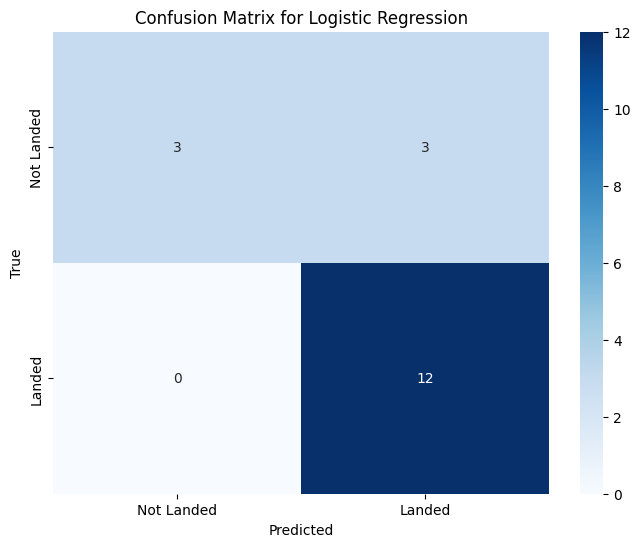

True Positive (Landed correctly): 12
False Positive (Landed incorrectly): 3


In [23]:

logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Accuracy on Test Data: ", logreg_accuracy)


logreg_yhat = logreg_cv.predict(X_test)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, logreg_yhat)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Landed', 'Landed'], yticklabels=['Not Landed', 'Landed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


TP = cm[1, 1]  
FP = cm[0, 1]  

print("True Positive (Landed correctly):", TP)
print("False Positive (Landed incorrectly):", FP)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define hyperparameter grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create SVM classifier
svm = SVC()

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model
svm_cv.fit(X_train, Y_train)

# Show best parameters and best cross-validation accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Cross-validation accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Cross-validation accuracy: 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.8333333333333334

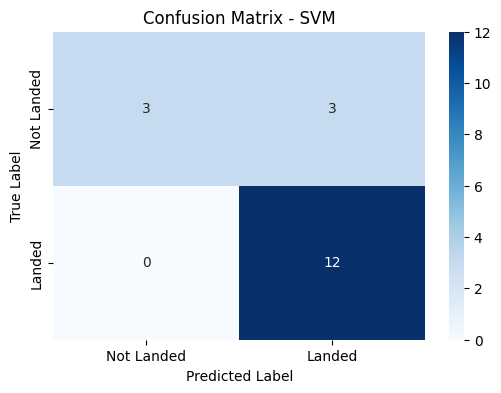

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best SVM model
svm_yhat = svm_cv.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, svm_yhat)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Landed', 'Landed'], yticklabels=['Not Landed', 'Landed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


We can plot the confusion matrix


## TASK  8


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Precisión promedio durante validación cruzada: 0.875


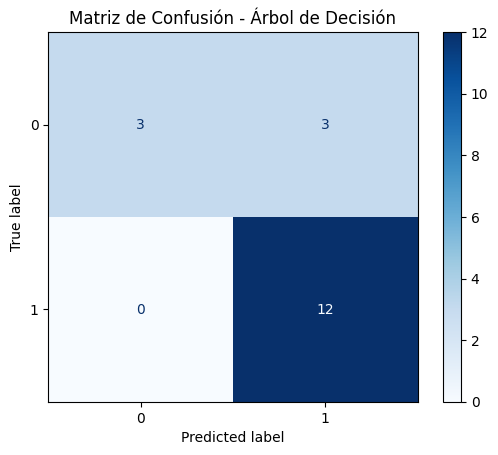

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Cargar los datos
url_X = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url_X)

url_Y = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
Y = pd.read_csv(url_Y)
Y = Y['Class']

# 2. Preprocesamiento
X = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 3. División en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# 4. Definir el árbol de decisión y el diccionario de parámetros
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  # 'auto' eliminado
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# 5. Ajustar el modelo
tree_cv.fit(X_train, Y_train)

# 6. Resultados
print("Mejores hiperparámetros:", tree_cv.best_params_)
print("Precisión promedio durante validación cruzada:", tree_cv.best_score_)

# 7. Predicción y matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test, cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Primeras filas de X (características):
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0

C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\BENI\anaconda3\Lib\site-packages


Precisión del modelo en el conjunto de prueba: 0.8889


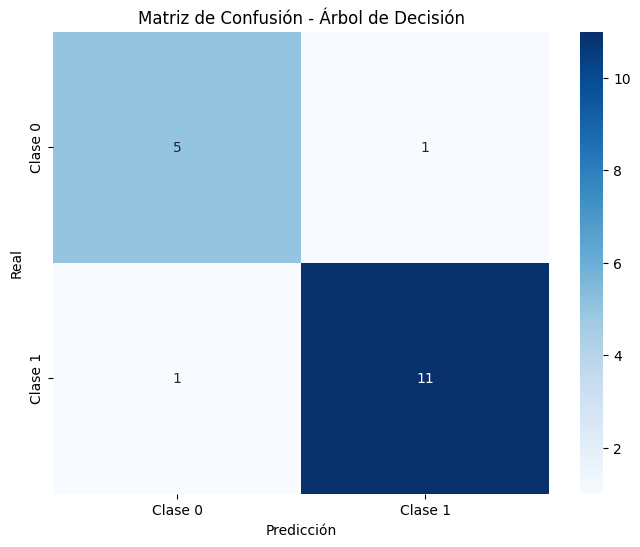

In [6]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url_X = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url_X)

print("Primeras filas de X (características):")
print(X.head())

url_Y = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
Y = pd.read_csv(url_Y)
print("\nPrimeras filas de Y (objetivo):")
print(Y.head())

# Convertir 'Class' en el objetivo
Y = Y['Class']

# Seleccionar solo las columnas numéricas en X
X = X.select_dtypes(include=['int64', 'float64'])

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir los datos en entrenamiento y prueba (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(f"\nNúmero de muestras de test: {len(Y_test)}")

# Definir los parámetros para GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Crear el objeto GridSearchCV con validación cruzada de 10 pliegues
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Calcular la precisión del modelo en el conjunto de prueba
tree_accuracy = tree_cv.score(X_test, Y_test)

# Imprimir la precisión
print(f"\nPrecisión del modelo en el conjunto de prueba: {tree_accuracy:.4f}")

# Hacer las predicciones en el conjunto de prueba
tree_yhat = tree_cv.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, tree_yhat)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


We can plot the confusion matrix


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
# Importar las bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir los parámetros para GridSearchCV
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Crear el modelo KNN
KNN = KNeighborsClassifier()

# Crear el objeto GridSearchCV con validación cruzada de 10 pliegues
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {knn_cv.best_params_}")

# Evaluar la precisión del modelo en el conjunto de prueba
knn_accuracy = knn_cv.score(X_test, Y_test)

# Imprimir la precisión en el conjunto de prueba
print(f"Precisión del modelo KNN en el conjunto de prueba: {knn_accuracy:.4f}")

# Realizar predicciones en el conjunto de prueba
knn_yhat = knn_cv.predict(X_test)

# Calcular la precisión en el conjunto de prueba
knn_accuracy = accuracy_score(Y_test, knn_yhat)

# Imprimir la precisión calculada
print(f"Precisión del modelo KNN (calculada): {knn_accuracy:.4f}")


C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_ind = s

Mejores parámetros encontrados: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
Precisión del modelo KNN en el conjunto de prueba: 0.8333
Precisión del modelo KNN (calculada): 0.8333


C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\BENI\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_ind = s

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK  11


## TASK  12


Find the method performs best:


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>
